# PCS - Principal Component Subspace

The **PCS(Principal Component Subspace)** method is an unsupervised learning technique that focuses on identifying and reducing the dimensionality of data by projecting it onto a lower-dimensional subspace. In other words, PCS uses **Principal Component Analysis(PCA)** or similar dimensionality reduction methods to discover the most significant features in a dataset.

While the **Principal Component Subspace(PCS)** method is often associated with dimensionality reduction, it can be applied in clustering and other unsupervised learning tasks. For this project, we'll implement an unsupervised learning model using PCA to reduce the dimensionality of data and then perform clustering with an algorithm like K-Means to group the data.

### Import Libraries

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Generate synthetic data

In [3]:
X, _ = make_blobs(n_samples = 500, centers = 5, cluster_std = 1.0,
                 random_state = 42)

### Preprocessing - Standardize the data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply PCA (Principle Component Analysis)

_Here we reduce to 2 principal components for visualization_

In [5]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

### Apply K-means clustering on the reduced PCA Data

In [6]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

### Visualize the results

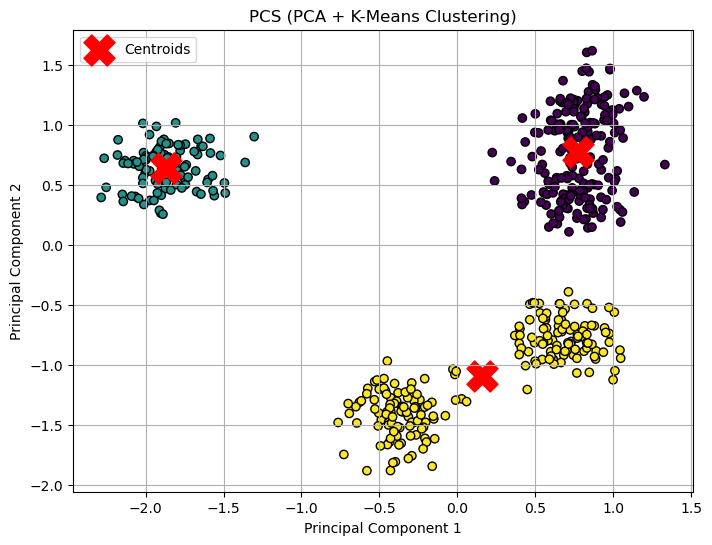

In [7]:
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_kmeans, cmap = 'viridis',
           marker = 'o', edgecolor = 'black')

# Marking centroids of clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 500, 
           marker = 'X', label = "Centroids")

plt.title('PCS (PCA + K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.grid(True)
plt.show()